<a href="https://colab.research.google.com/github/baovin/CV_VIN/blob/main/CV01_Homework_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BTVN: Phát hiện da người dựa trên lấy ngưỡng trên không gian màu

- Sử dụng không gian màu để phát hiện da trong bức ảnh
- có thể sử dụng các ngưỡng sau :
  - 0<=H<=17 and 15<=S<=170 and 0<=V<=255
  - 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135
  - 0<=Y<=255 and 150<=Cr<=200 and 100<=Cb<=150
- Có thể kết hợp các kết quả 2 không gian với nhau
- So sánh và nhận xét trên các tập dữ liệu trong folder skin
-Tài liệu tham khảo:
     https://linkinghub.elsevier.com/retrieve/pii/S0262885620300573
     Shaik_ICRTC-2015: Comparative Study of Skin Color Detection and Segmentation in HSV and YCbCr Color Space

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import cv2
import numpy as np

#Open a simple image
img=cv2.imread("/content/drive/MyDrive/homework_01/skin/HGR1/0/T_P_hgr1_id04_8.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


# show results
# cv2.imshow("1_HSV.jpg",HSV_result)
# cv2.imshow("2_YCbCr.jpg",YCrCb_result)
# cv2.imshow("3_global_result.jpg",global_result)
# cv2.imshow("Image.jpg",img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

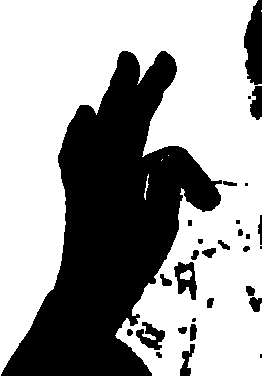

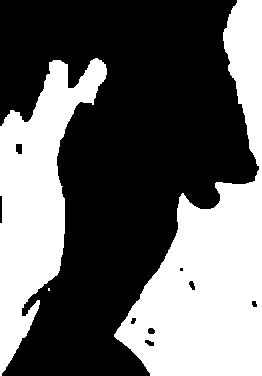

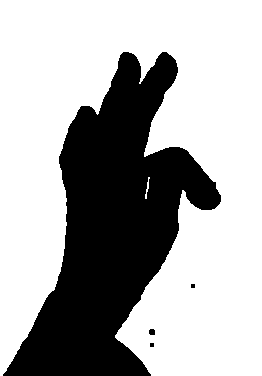

In [17]:
from google.colab.patches import cv2_imshow
cv2_imshow(HSV_result)
cv2_imshow(YCrCb_result)
cv2_imshow(global_result)